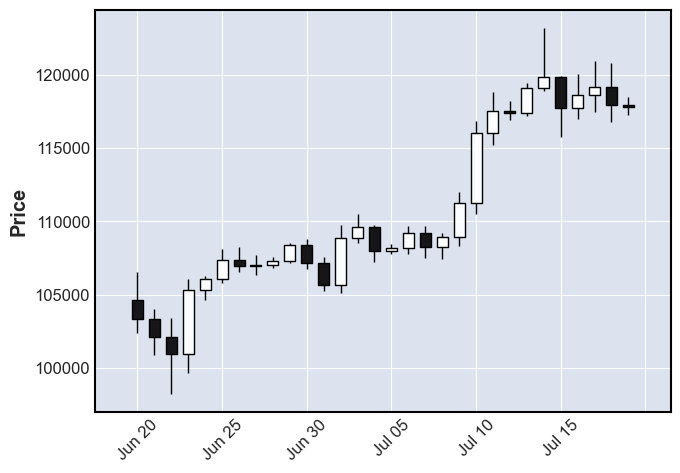

['binance', 'binancedark', 'blueskies', 'brasil', 'charles', 'checkers', 'classic', 'default', 'ibd', 'kenan', 'mike', 'nightclouds', 'sas', 'starsandstripes', 'tradingview', 'yahoo']


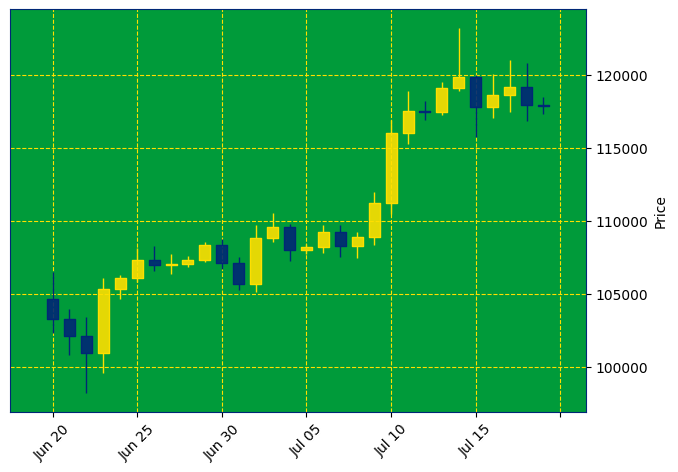

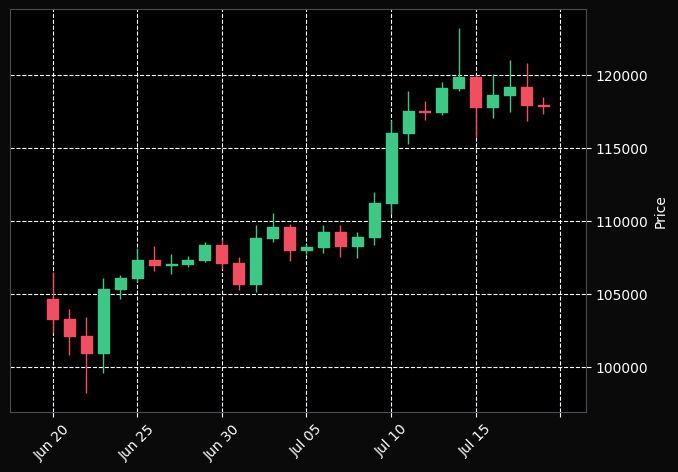

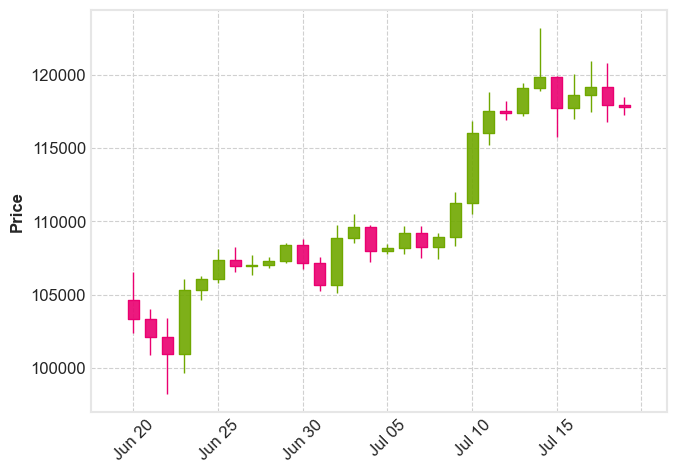

In [ ]:
import pandas as pd
import matplotlib.pyplot as pl
import mplfinance as mpf

# Referência https://www.youtube.com/watch?v=iufeGhOBVNg

# 1. Ler o arquivo Excel
df = pd.read_csv("../../data/fechamentos/BTCUSDT_1d_data.csv")

# 2. Converter timestamp para datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.set_index('timestamp')

# Intervalo reduzido
data_inicial = '2025-06-20'
data_final   = '2025-07-19'
df = df.loc[data_inicial:data_final]

mpf.plot(df, type="candle")

print(mpf.available_styles())

mpf.plot(df, type="candle", style='brasil')
mpf.plot(df, type="candle", style='binancedark')
mpf.plot(df, type="candle", style='binance')





In [35]:
import pandas as pd
import plotly.graph_objects as go

#referência https://www.youtube.com/watch?v=2HkhiAtMOv4

# 1. Ler o arquivo CSV
df = pd.read_csv("../../data/fechamentos/BTCUSDT_1d_data.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])

# 2. Intervalo
data_inicial = '2025-03-20'
data_final   = '2025-07-19'
df = df.loc[(df["timestamp"] >= data_inicial) & (df["timestamp"] <= data_final)]


# 3. Criar o gráfico candlestick com graph_objects (go)
fig = go.Figure(data=[
    go.Candlestick(
        x=df["timestamp"],
        open=df["open"],
        high=df["high"],
        low=df["low"],
        close=df["close"],
        increasing_line_color='green',  # cor para candle de alta
        decreasing_line_color='red'     # cor para candle de baixa
    )
])

# 4. Ajustar o layout, adicionando elementos do tutorial
fig.update_layout(
    title="BTCUSDT — Candlestick (20 mar 2025 até 19 jul 2025)",
    xaxis_title="Data",
    yaxis_title="Preço",
    #xaxis_rangeslider_visible=False  # esconde controle deslizante no eixo X
)

# 5. Exibir gráfico
fig.show(renderer="browser")
fig.show()

# Banda de Bollinger

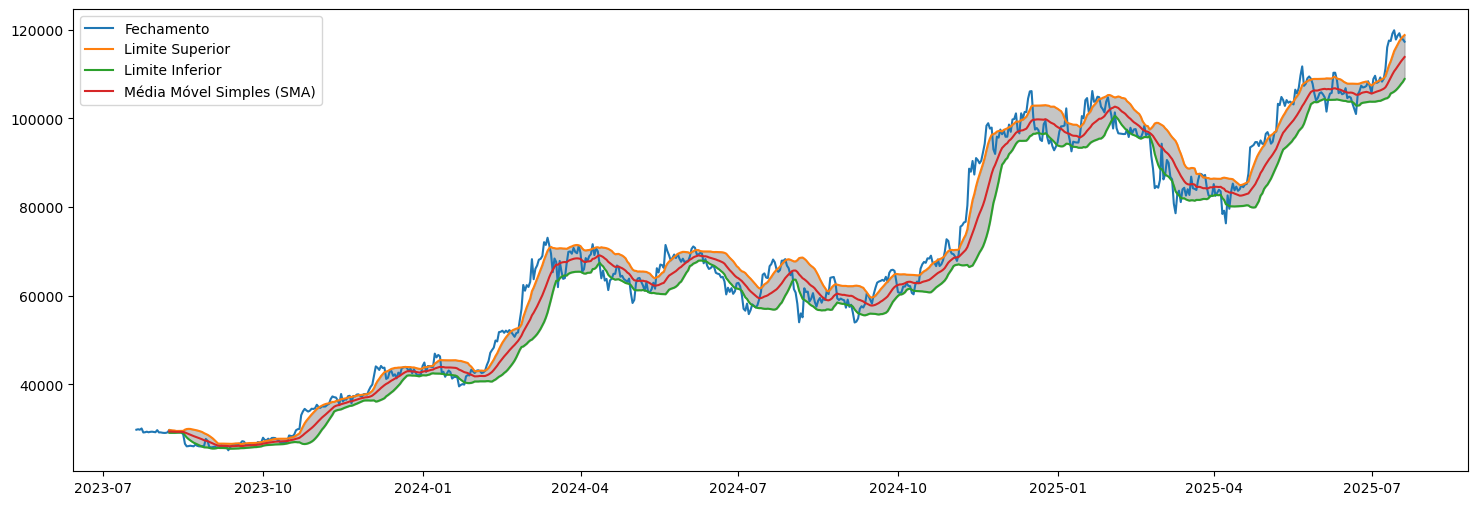

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Ler o arquivo Excel
df = pd.read_csv("../../data/fechamentos/BTCUSDT_1d_data.csv")


df['timestamp'] = pd.to_datetime(df['timestamp'])

janela = 20 #janela de 20 dias
std_num = 1

df['media_movel_simples'] = df['close'].rolling(janela).mean()
df['STD'] = df['close'].rolling(janela).std()

#limite superior e inferior
df['upper'] = df['media_movel_simples'] + (std_num * df['STD'])
df['lower'] = df['media_movel_simples'] - (std_num * df['STD'])

#Plotar Gráfico
plt.figure(figsize=(18,6))

plt.plot(df['timestamp'], df['close'], label="Fechamento")
plt.plot(df['timestamp'], df['upper'], label="Limite Superior")
plt.plot(df['timestamp'], df['lower'], label="Limite Inferior")
plt.plot(df['timestamp'], df['media_movel_simples'], label="Média Móvel Simples (SMA)")

plt.legend()


# Preenchimento das faixas

plt.fill_between(df['timestamp'], df['lower'], df['upper'], color='Gray', alpha=0.45)




plt.show()